In [1]:
from __future__ import print_function, division

# Introducing Seaborn

Seaborn is a high-level data visualisation package based on Matplotlib. 
https://seaborn.pydata.org/index.html

A major advantage of Seaborn is the ease to create informative statistical charts with appealing default aesthetics.

However, Seaborn should be viewed as a complement to matplotlib, not a replacement for it. A combination of both will allow you to create highly customisable charts with visually appealing aesthetics.

__Content:__
- 4.1.1 Distplot
- 4.1.2 Kdeplot
- 4.1.3 Visualising Linear Relationship

__Import libraries__

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

__Import data__

Seaborn comes with built-in data sets. The following are most commonly used data sets:
 - iris
 - tips
 - titanic
 - exercise


In [3]:
# import built-in data sets from seaborn
iris = sns.load_dataset('iris')
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
48,5.3,3.7,1.5,0.2,setosa
84,5.4,3.0,4.5,1.5,versicolor
113,5.7,2.5,5.0,2.0,virginica
128,6.4,2.8,5.6,2.1,virginica
1,4.9,3.0,1.4,0.2,setosa


## 4.1.1 Distplot

In matplotlib, we use plt.hist to plot histogram of a numerical variable. In Seaborn, we use the distplot, which by default, combines histogram with kde plot.

Kernel Density Estimatation (KDE) is a non-parametric way of estimating the density function of underlying data.

https://en.wikipedia.org/wiki/Kernel_density_estimation

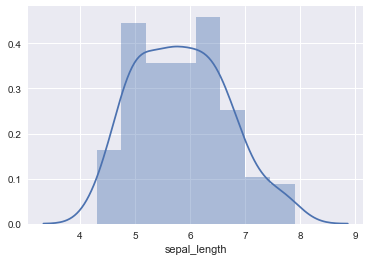

In [8]:
# Visualise the distribution of sepal length
sns.distplot(iris['sepal_length']);

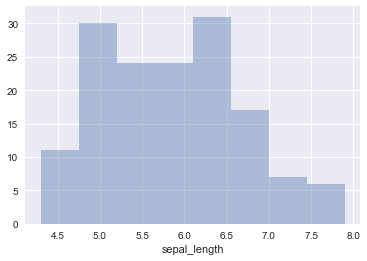

In [5]:
# Show histogram only by removing the KDE layer
sns.distplot(iris['sepal_length'],kde=False);
# Notice the y-axis is count/frequency

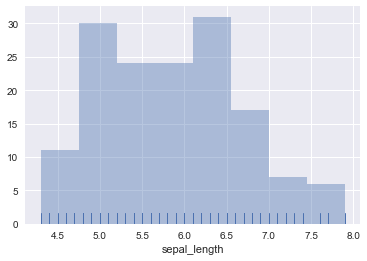

In [17]:
# Rugplot draws a small vertical tick at each individual data point
sns.distplot(iris['sepal_length'],kde=False, rug=True);

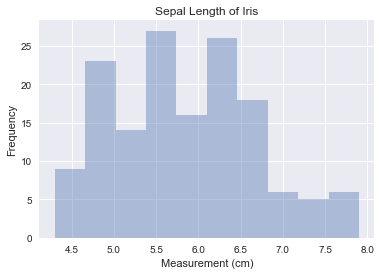

In [15]:
# Customisations: change the bin size, rename axis labels, set title
ax = sns.distplot(iris['sepal_length'],kde=False,bins=10)
ax.set(xlabel='Measurement (cm)',ylabel='Frequency',title='Sepal Length of Iris');

## 4.1.2 Kde Plot

The default choice of kernel is Gaussian. There are other choices of kernels for univariate kde plot but only Gaussian kernel is available for bivariate kde plot.

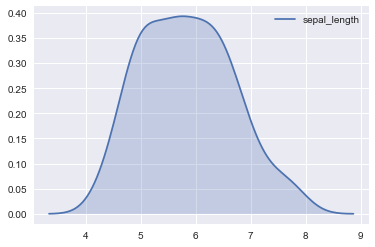

In [18]:
# Kde plot for one variable
sns.kdeplot(iris['sepal_length'],shade=True);

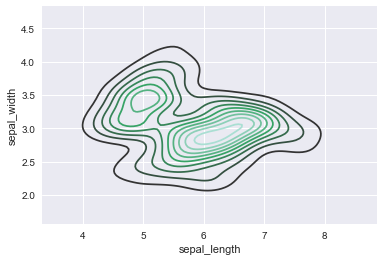

In [38]:
# Kde plot for two variables
sns.kdeplot(iris['sepal_length'],iris['sepal_width']);

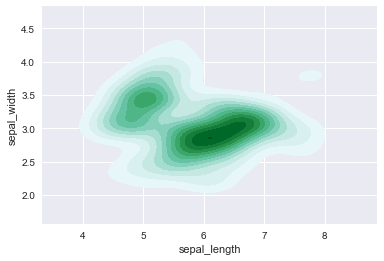

In [51]:
# Customising kde plot
sns.kdeplot(iris['sepal_length'],iris['sepal_width'],shade=True,shade_lowest=False,n_levels=15);

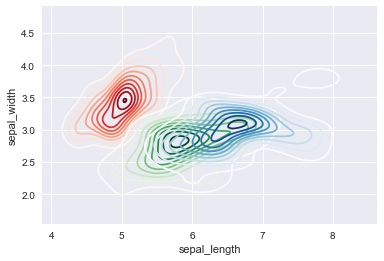

In [60]:
# Forms 3 subsets of from iris dataframe
setosa = iris.loc[iris.species == "setosa"]
versicolor = iris.loc[iris.species == "versicolor"]
virginica = iris.loc[iris.species == "virginica"]
# Show 3 overlapping kde plots 
sns.kdeplot(setosa.sepal_length, setosa.sepal_width, cmap="Reds")
sns.kdeplot(versicolor.sepal_length, versicolor.sepal_width, cmap="Greens")
sns.kdeplot(virginica.sepal_length, virginica.sepal_width, cmap="Blues");
#sns.regplot('sepal_length','sepal_width',data=iris,fit_reg=False,color='k');

## 4.1.3 Visualising Linear Relationship

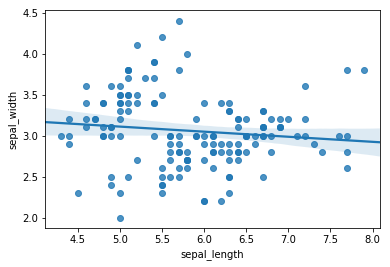

In [4]:
# Scatter plot with fitted regression line (by default)
sns.regplot('sepal_length','sepal_width',data=iris);

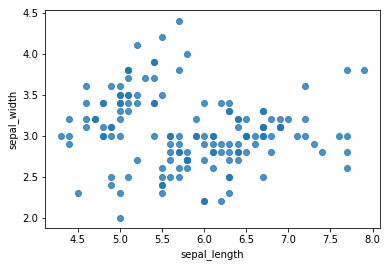

In [5]:
# Show scatter plot only, without the regression line
sns.regplot('sepal_length','sepal_width',data=iris,fit_reg=False);

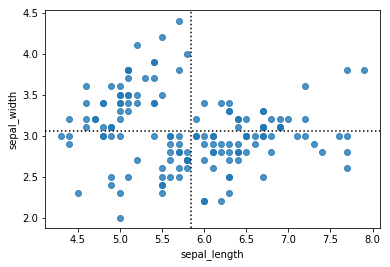

In [6]:
# Insert vertical and horizontal lines
sns.regplot('sepal_length','sepal_width',data=iris,fit_reg=False)
plt.axvline(iris['sepal_length'].mean(),color='k',linestyle=':')
plt.axhline(iris['sepal_width'].mean(),color='k',linestyle=':');

Use scipy.stats library to obtain the equation of the regression line: $\hat{y}=b_1 x + b_0$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html


In [7]:
import scipy.stats as stats
# stats.linregress will return five outputs:
slope, intercept, r_value, p_value, std_err = stats.linregress(iris['sepal_length'],iris['sepal_width'])

# Print the regression line y=mx+c
reg_eqn = 'y = %.2f x + %.2f'% (slope,intercept)
print(reg_eqn)

y = -0.06 x + 3.42


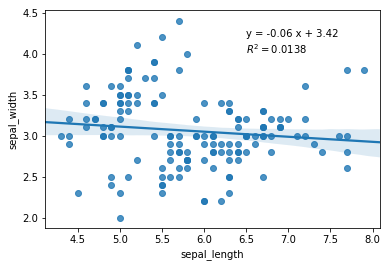

In [8]:
# Display equation of regression line and R^2 value
sns.regplot('sepal_length', 'sepal_width', data=iris)
plt.text(6.5,4.2, reg_eqn, fontsize=10)
plt.text(6.5,4,'$R^2 = %.4f$' % (r_value**2), fontsize=10);

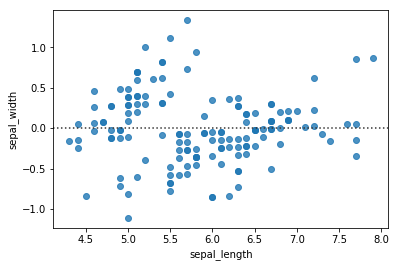

In [9]:
# Show residual plot
sns.residplot('sepal_length','sepal_width',data=iris);